In [1]:

import tensorflow as tf
import numpy as np
from PIL import Image
from itertools import product
import math
import os
from tensorflow.keras.layers import Flatten


model_folder = '../checkpoints/vlae_mmd_all'
image_output_folder = '../report/figures/images'
plot_output_folder = '../report/figures/panels'
n_latents = 4 
latent_size = 10

In [2]:
#TODO: Move these functions to separate dataprocessing util
def custom_loss(x, xhat):
    return  .5 * tf.losses.mean_squared_error(tf.keras.layers.Flatten()(x), tf.keras.layers.Flatten()(xhat)) * np.prod([256,256,3])

def sample_likelihood(x, x_hat):
    mse = - tf.losses.mean_squared_error(Flatten()(x), Flatten()(x_hat))
    return 1./(tf.sqrt(2.*math.pi))*tf.exp(-.5*(mse)**2.)

def embed_images(x):
    x = vae.get_layer('encoder').predict(x, batch_size=10)
    return [vae.get_layer('z_1_latent')(x[0]), 
            vae.get_layer('z_2_latent')(x[1]),
            vae.get_layer('z_3_latent')(x[2]),
            vae.get_layer('z_4_latent')(x[3])]

def reconstruct_images(z):
    return vae.get_layer('decoder').predict(z)

vae = tf.keras.models.load_model(model_folder, custom_objects={'loss': custom_loss}, compile=False)
vae.compile()

In [3]:
real_images = np.load("/home/etheredge/Workspace/tcvae/data/imgs_trainVAE.npy")
# with tf.device("GPU:1"):
#         z = embed_images(real_images)
#         x_hat = reconstruct_images(z)
#         likelihood = sample_likelihood(real_images, x_hat)

In [4]:
z = np.load('z.npy')

In [5]:
x_hat = np.load('x_hat.npy')

In [6]:
import matplotlib.pyplot as plt

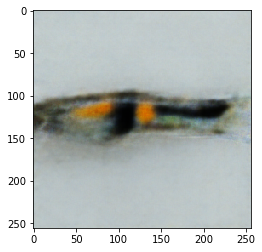

In [22]:
plt.imshow(x_hat[325])

In [8]:
def make_traversal_from_sample(model, z, n_samples=1, num_steps=5, sample_id=0):
    output_folder = os.path.join(image_output_folder, 'explore_latents/blender')

#     multipliers = np.linspace(-2,2,num=num_steps)
    multipliers = np.linspace((0, -2, 0, 2), (-2, 0, 2, 0), num_steps, axis=1).flatten()
    print(multipliers)
    encoded_sample = [z_i[sample_id] for z_i in z]
    i = 0
    for z_i in range(2,4):
#         image_container = Image.new('RGB', (256*num_steps,256*latent_size))
        for z_i_j in range(latent_size):
            for s in range(len(multipliers)):
                sample = [np.array([encoded_sample[0].numpy()]),
                      np.array([encoded_sample[1].numpy()]),
                      np.array([encoded_sample[2].numpy()]),
                      np.array([encoded_sample[3].numpy()])]
                
                sample[z_i][0][z_i_j] = multipliers[s]
                generated = model.get_layer('decoder').predict(sample, batch_size=1)
                generated = generated.reshape((256, 256,3))
                img = 255 * np.array(generated)
                img = img.astype(np.uint8)
                img = Image.fromarray(img)
#                 image_container.paste(Image.fromarray(img.astype('uint8')), (s*256, z_i_j*256))
                img.save(os.path.join(output_folder,'sample_{:04d}.jpg'.format(i)))
                i = i+1



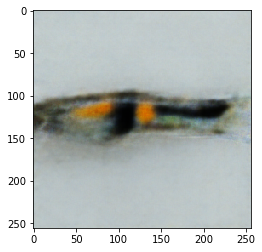

In [66]:
plt.imshow(x_hat[325])

In [67]:
encoded_sample_1 = [z_i[10] for z_i in z]
encoded_sample_2 = [z_i[325] for z_i in z]

In [68]:
interpos = [np.linspace(z_i[10], z_i[325], num=250) for z_i in z]

In [69]:
interpos_images = reconstruct_images(interpos)

In [70]:
interpos_images = interpos_images * 255
interpos_images = interpos_images.astype(np.uint8)

In [71]:
output_folder = os.path.join(image_output_folder, 'explore_latents/blender2')

In [72]:
for i, interpo in enumerate(interpos_images):
    img = Image.fromarray(interpo)
    img.save(os.path.join(output_folder,'sample_{:04d}.jpg'.format(i)))

In [39]:
def make_traversal_from_sample(model, z, n_samples=1, num_steps=5, sample_id_1=0, sample_id_2=1):
    output_folder = os.path.join(image_output_folder, 'explore_latents/blender')

#     multipliers = np.linspace(-2,2,num=num_steps)
    multipliers = np.linspace((0, -2, 0, 2), (-2, 0, 2, 0), num_steps, axis=1).flatten()
    print(multipliers)
    encoded_sample_1 = [z_i[sample_id_1] for z_i in z]
    encoded_sample_2 = [z_i[sample_id_2] for z_i in z]
    
    for z_i in range(2,4):
#         image_container = Image.new('RGB', (256*num_steps,256*latent_size))
        for z_i_j in range(latent_size):
            for s in range(len(multipliers)):
                sample = [np.array([encoded_sample[0].numpy()]),
                      np.array([encoded_sample[1].numpy()]),
                      np.array([encoded_sample[2].numpy()]),
                      np.array([encoded_sample[3].numpy()])]
                
                sample[z_i][0][z_i_j] = multipliers[s]
                generated = model.get_layer('decoder').predict(sample, batch_size=1)
                generated = generated.reshape((256, 256,3))
                img = 255 * np.array(generated)
                img = img.astype(np.uint8)
                img = Image.fromarray(img)
#                 image_container.paste(Image.fromarray(img.astype('uint8')), (s*256, z_i_j*256))
                img.save(os.path.join(output_folder,'sample_{:04d}.jpg'.format(i)))
                i = i+1

In [34]:
def make_traversal_from_sample(model, z, n_samples=1, num_steps=5, sample_id=0):
    output_folder = os.path.join(image_output_folder, 'explore_latents/blender')

#     multipliers = np.linspace(-2,2,num=num_steps)
    multipliers = np.linspace((0, -2, 0, 2), (-2, 0, 2, 0), num_steps, axis=1).flatten()
    print(multipliers)
    encoded_sample = [z_i[sample_id] for z_i in z]
    i = 0
    for z_i in range(2,4):
#         image_container = Image.new('RGB', (256*num_steps,256*latent_size))
        for z_i_j in range(latent_size):
            for s in range(len(multipliers)):
                sample = [np.array([encoded_sample[0].numpy()]),
                      np.array([encoded_sample[1].numpy()]),
                      np.array([encoded_sample[2].numpy()]),
                      np.array([encoded_sample[3].numpy()])]
                
                sample[z_i][0][z_i_j] = multipliers[s]
                generated = model.get_layer('decoder').predict(sample, batch_size=1)
                generated = generated.reshape((256, 256,3))
                img = 255 * np.array(generated)
                img = img.astype(np.uint8)
                img = Image.fromarray(img)
#                 image_container.paste(Image.fromarray(img.astype('uint8')), (s*256, z_i_j*256))
                img.save(os.path.join(output_folder,'sample_{:04d}.jpg'.format(i)))
                i = i+1



In [ ]:
def make_rand_samples(model, n_samples=9, num_steps=300, mu=0, sigma=1):
    output_folder = os.path.join(image_output_folder, 'explore_latents/random_normal/frames')
    
    sample =  [
        np.random.multivariate_normal([mu] * latent_size,np.diag([sigma] * latent_size), n_samples)
        ] * n_latents

    for z in range(n_latents):
        for t in range(num_steps):
            sample[z] = np.random.multivariate_normal(
                [mu] * latent_size, np.diag([sigma] * latent_size), n_samples)
            generated = model.get_layer('decoder').predict(sample, batch_size=10)
            generated = generated.reshape((n_samples, 256, 256,3))
            image_container = Image.new('RGB', (256*3,256*3))
            locs = list(product(range(int(np.sqrt(n_samples))),range(int(np.sqrt(n_samples)))))
            for i in range(n_samples):
                img = generated[i]
                j, k = locs[i]
                img = 255 * np.array(img)
                img = img.astype(np.uint8)
                image_container.paste(Image.fromarray(img.astype('uint8')), (k*256, j*256))
            image_container.save(os.path.join(output_folder,'z{}_{:03d}.jpg'.format(z,t)))